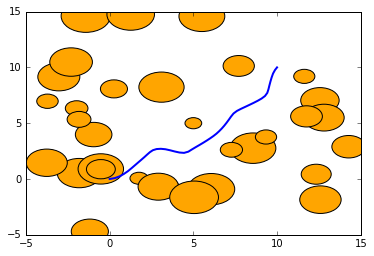

In [290]:
%reload_ext autoreload
%autoreload 2
import matplotlib.animation as animation
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from CHOMPTrajectory import *
from IPython.display import HTML
import random

obs1 = Obstacle(5.0, 5.0, 0.5)
#obs2 = Obstacle(8.0, 10.0, 1.0)
#obs3 = Obstacle(2.0, )
obstacles = [obs1]
for n in range(32):
    obs= Obstacle(random.uniform(-5.,15.), random.uniform(-5.,15.), random.uniform(.5,1.5))
    obstacles.append(obs)

uav = UAV2D(0.5, 0.5)
world = World2D(10.0, -10.0, 10.0, -10.0, obstacles)
wp = CHOMPWaypoint(0.0,0.0,0.0)
end = CHOMPWaypoint(10.0, 10.0, 0.0)

traj = CHOMPTrajectory(50, wp, end, 1.0, uav, world)
tr = traj.vector()
tr_x = tr[0::3]
tr_y = tr[1::3]
tr_t = tr[2::3]

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig, axes = plt.subplots()
line, = axes.plot([], [], lw=2)
for o in obstacles:
    ob = np.array([o.x, o.y])
    circ = Circle(ob, radius=o.r, facecolor="orange", edgecolor='black', fill=True ,linewidth = 1.0, linestyle='solid')
    axes.add_patch(circ)
axes.set_xlim(-5, 15)
axes.set_ylim(-5, 15)

def animate(i):
    if(i == 0):
        line.set_data(tr_x,tr_y)
    else:
        ctr =  traj.runCHOMP(400,1)
        ctr_x = ctr[0::3]
        ctr_y = ctr[1::3]
        ctr_t = ctr[2::3]
        line.set_data(ctr_x,ctr_y)
    return line,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, blit=True)
anim.save('test.mp4', writer=writer)

HTML(anim.to_html5_video())

plt.show()




In [291]:
import os
# Run the unit tests to ensure you have working implementation
os.popen("python test_set_chomp.py test_results.json")

# Print the results json for review
import test_set_chomp
print test_set_chomp.pretty_format_json_results("test_results.json")

Test Test Obstacle: 1.00/1.00.

Test Test Point2D: 1.00/1.00.

Test Test UAV2D: 1.00/1.00.

Test Test corner transforms: 1.00/1.00.

Test Test World2D: 1.00/1.00.

Test Test world2d distance cost: 1.00/1.00.

Test Test CHOMPTrajectory: 1.00/1.00.

Test Test Obstacles cost on trajectory with no obstacles: 1.00/1.00.

Test Test Obstacles cost on trajectory with obstacles: 1.00/1.00.

Test Test Obstacles cost on trajectory with obstacles: 1.00/1.00.

Test Test Smoothness cost on trajectory: 1.00/1.00.

Test Test CHOMPWaypoint: 1.00/1.00.

TOTAL TESTS PASSED: 12.00/12.00

